# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



In [ ]:
Vm=float(input("Ingresa la velocidad del motociclista: "))
Ap=float(input("Ingresa la aceleración del policía: "))
Xi=0
Ti=0
t=np.linspace(0,20,100) # Vector de tiempos desde 0 hasta 20 segundos, con 100 puntos equiespaciados
Xm=Vm*t # Posición del motociclista en función del tiempo
Xp=(1/2)*Ap*(t**2)   # Posición del policía en función del tiempo
Tmp=2*Vm/Ap # Tiempo que tarda el policía en alcanzar al motociclista
Tmp # Muestra el tiempo calculado

Ingresa la velocidad del motociclista: 15
Ingresa la aceleración del policía: 3


10.0

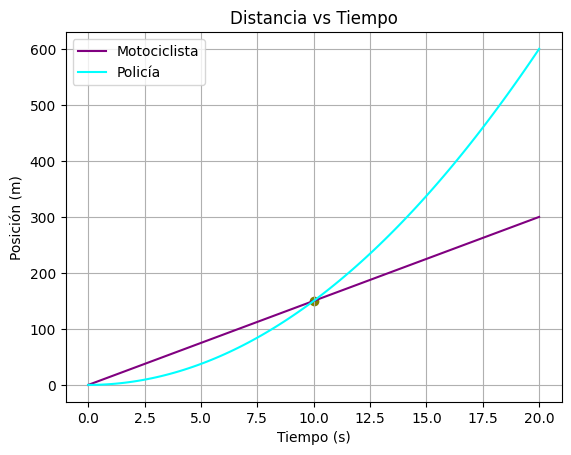

In [ ]:
plt.plot(t,Xm,label="Motociclista", color="purple")
plt.plot(t,Xp,label="Policía", color="cyan")
plt.scatter(Tmp,Vm*Tmp,color="olive")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición (m)")
plt.title("Distancia vs Tiempo")
plt.legend()
plt.grid()
plt.show()

---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




In [ ]:
def LJ(eps,sig,r):
    return 4*eps*(((sig/r)**12)-((sig/r)**6))

1.122462048309373 - 1.121212121212121


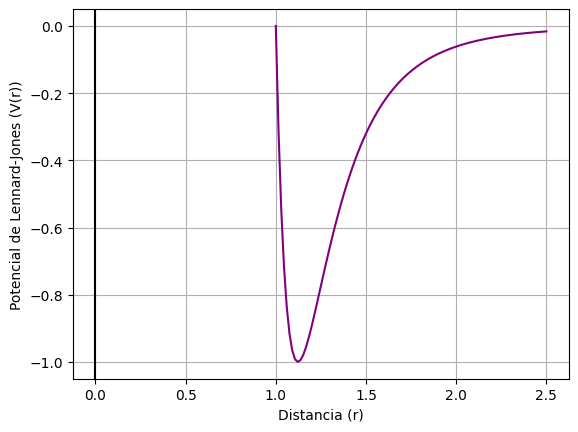

In [ ]:
eps=sig=1
Rc=2.5*sig
r=np.linspace(1,Rc,100)
V=LJ(eps,sig,r)
min=np.argmin(V) # Índice donde el potencial es mínimo (punto de equilibrio)
print(2**(1/6)*sig, "-", r[min])

plt.plot(r,V, color="purple")
plt.axvline(0,color="black")
plt.xlabel("Distancia (r)")
plt.ylabel("Potencial de Lennard-Jones (V(r))")
plt.grid()
plt.show()

Para sigma = 1: Rm computacional=1.121212121212121, Rm teórico=1.122462048309373
Para sigma = 2: Rm computacional=2.242424242424242, Rm teórico=2.244924096618746
Para sigma = 3: Rm computacional=3.3636363636363638, Rm teórico=3.367386144928119
Para sigma = 4: Rm computacional=4.484848484848484, Rm teórico=4.489848193237492
Para sigma = 5: Rm computacional=5.606060606060606, Rm teórico=5.612310241546865
Para sigma = 6: Rm computacional=6.7272727272727275, Rm teórico=6.734772289856238
Para sigma = 7: Rm computacional=7.848484848484849, Rm teórico=7.857234338165611
Para sigma = 8: Rm computacional=8.969696969696969, Rm teórico=8.979696386474984
Para sigma = 9: Rm computacional=10.09090909090909, Rm teórico=10.102158434784357
Para sigma = 10: Rm computacional=11.212121212121213, Rm teórico=11.22462048309373


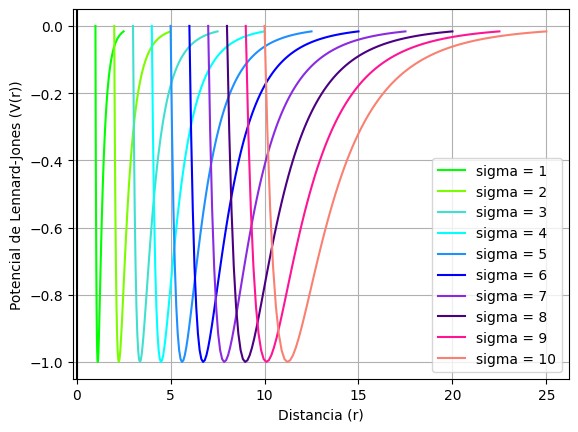

In [ ]:
Valores_sig = [i for i in range(1, 11)]
colores = ["lime", "lawngreen", "turquoise", "cyan", "dodgerblue", "blue", "blueviolet", "indigo", "deeppink", "salmon"]
eps = 1

for i, sigma in enumerate(Valores_sig): # Recorre la lista 'Valores_sig' con índice y valor:
    r = np.linspace(1 * sigma, 2.5 * sigma, 100)  # Para cada sigma, se genera un vector de distancias entre sigma y 2.5 veces sigma
    V = LJ(eps, sigma, r)  # Se calcula el potencial de Lennard-Jones para ese rango de r
    min = np.argmin(V)  # Se encuentra el índice del mínimo del potencial
    print(f"Para sigma = {sigma}: Rm computacional={r[min]}, Rm teórico={(2**(1/6))*sigma}")
    plt.plot(r, V, label='sigma = ' + str(sigma), color=colores[i]) # Se grafica el potencial en función de la distancia para cada sigma, con color distinto y etiqueta

plt.axvline(0, color="black")
plt.xlabel("Distancia (r)")
plt.ylabel("Potencial de Lennard-Jones (V(r))")
plt.grid()
plt.legend()
plt.show()

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [ ]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]